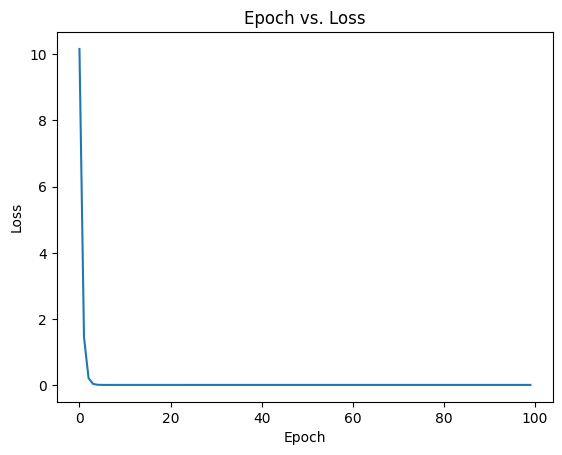

In [1]:
import torch
import matplotlib.pyplot as plt

x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 
                  22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 
                  19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])


w = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(1.0, requires_grad=True)


learning_rate = 0.001
epochs = 100


losses = []

for epoch in range(epochs):
    
    y_pred = w * x + b
    loss = ((y_pred - y)**2).mean()
    loss.backward()
    
    with torch.no_grad():
        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        w.grad.zero_()
        b.grad.zero_()

    losses.append(loss.item())

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.show()


In [2]:
x = torch.tensor([2,4])
y = torch.tensor([20,40])

b = torch.tensor([1.0], requires_grad = True)
w = torch.tensor([1.0], requires_grad = True)

learning_rate = torch.tensor(0.001)


for epochs in range(2):
    loss = 0.0
    for j in range(len(x)):
        a = w*x[j]
        y_p = a+b
        loss += (y_p - y[j])**2
    loss = loss/len(x)
    print ("avg loss =",loss)
    loss.backward()

    print("w.grad = ", w.grad)
    print("b.grad = ", b.grad)
   

    with torch.no_grad():
        w-=learning_rate *w.grad
        b-=learning_rate *b.grad
    w.grad.zero_()
    b.grad.zero_()

    print("w updated = ", w)
    print("b updated = ", b)

avg loss = tensor([757.], grad_fn=<DivBackward0>)
w.grad =  tensor([-174.])
b.grad =  tensor([-52.])
w updated =  tensor([1.1740], requires_grad=True)
b updated =  tensor([1.0520], requires_grad=True)
avg loss = tensor([724.3798], grad_fn=<DivBackward0>)
w.grad =  tensor([-170.2080])
b.grad =  tensor([-50.8520])
w updated =  tensor([1.3442], requires_grad=True)
b updated =  tensor([1.1029], requires_grad=True)


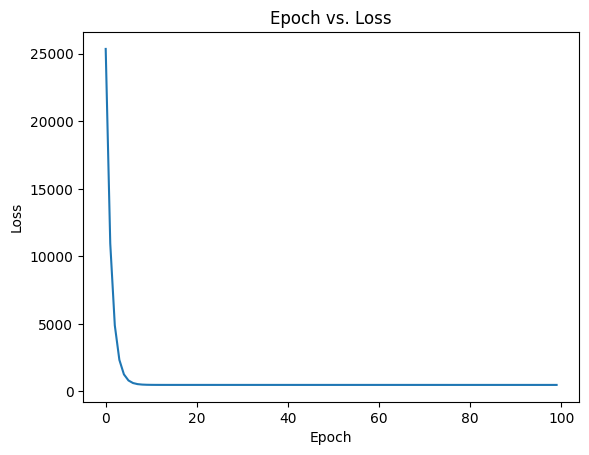

In [3]:
import torch
import matplotlib.pyplot as plt

class RegressionModel:
    def __init__(self):
        
        self.w = torch.tensor(1.0, requires_grad=True)
        self.b = torch.tensor(1.0, requires_grad=True)

    def forward(self, x):

        return self.w * x + self.b

    def update(self, learning_rate):

        with torch.no_grad():
            self.w -= learning_rate * self.w.grad
            self.b -= learning_rate * self.b.grad

            self.reset_grad()

    def reset_grad(self):
        
        self.w.grad.zero_()
        self.b.grad.zero_()

    def criterion(self, y, yp):
        
        return ((yp - y)**2).mean()

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])

learning_rate = torch.tensor(0.001)

model = RegressionModel()

epochs = 100
losses = []

for epoch in range(epochs):
    
    y_pred = model.forward(x)
    loss = model.criterion(y, y_pred)
    losses.append(loss.item())

    loss.backward()
    model.update(learning_rate)

    model.reset_grad()

plt.plot(range(epochs), losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs. Loss')
plt.show()

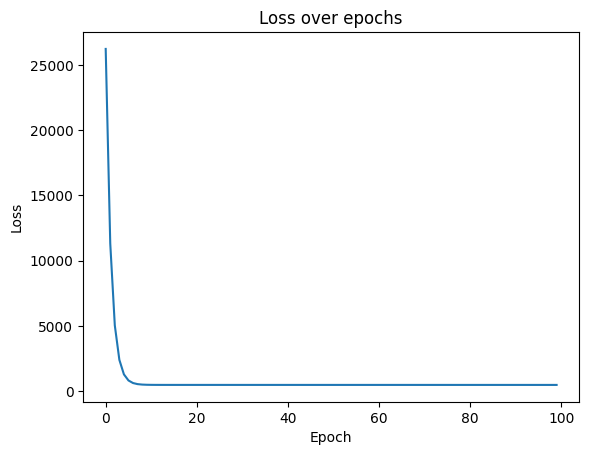

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0], dtype=torch.float32)
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0], dtype=torch.float32)

class RegressionDataset(Dataset):
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def __len__(self):
        return len(self.x)

    def __getitem__(self, idx):
        return self.x[idx], self.y[idx]

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

dataset = RegressionDataset(x.view(-1, 1), y.view(-1, 1))
dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=True)

model = RegressionModel()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

loss_list = []

for epoch in range(100):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
    loss_list.append(loss.item())

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()


Epoch [10/100], Loss: 0.0139
Epoch [20/100], Loss: 0.0139
Epoch [30/100], Loss: 0.0139
Epoch [40/100], Loss: 0.0139
Epoch [50/100], Loss: 0.0139
Epoch [60/100], Loss: 0.0139
Epoch [70/100], Loss: 0.0139
Epoch [80/100], Loss: 0.0139
Epoch [90/100], Loss: 0.0139
Epoch [100/100], Loss: 0.0139


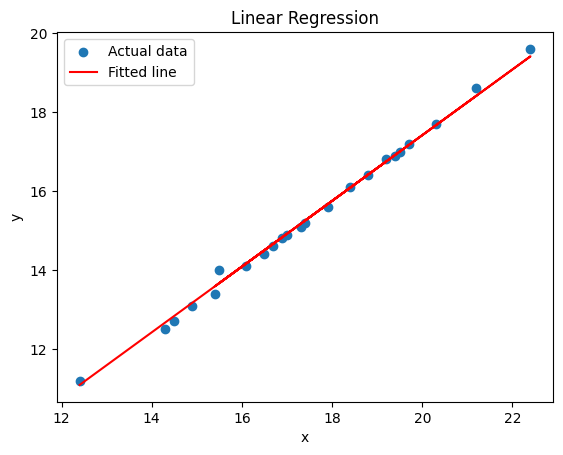

In [5]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2], dtype=torch.float32).view(-1, 1)
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6], dtype=torch.float32).view(-1, 1)

class RegressionModel(nn.Module):
    def __init__(self):
        super(RegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = RegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 100
loss_list = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.scatter(x, y, label='Actual data')
plt.plot(x, model(x).detach().numpy(), color='red', label='Fitted line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

Epoch [100/1000], Loss: 7.4949
Epoch [200/1000], Loss: 2.5922
Epoch [300/1000], Loss: 1.2175
Epoch [400/1000], Loss: 0.8198
Epoch [500/1000], Loss: 0.6930
Epoch [600/1000], Loss: 0.6419
Epoch [700/1000], Loss: 0.6122
Epoch [800/1000], Loss: 0.5890
Epoch [900/1000], Loss: 0.5681
Epoch [1000/1000], Loss: 0.5483
Prediction for X1=3, X2=2: 5.323825359344482


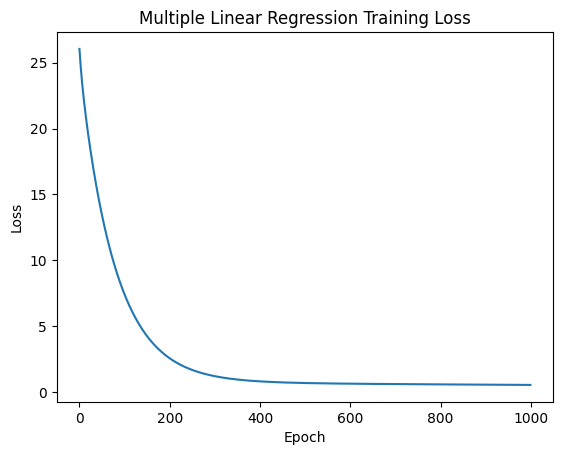

In [6]:
X1 = torch.tensor([3, 4, 5, 6, 2], dtype=torch.float32).view(-1, 1)
X2 = torch.tensor([8, 5, 7, 3, 1], dtype=torch.float32).view(-1, 1)
Y = torch.tensor([-3.7, 3.5, 2.5, 11.5, 5.7], dtype=torch.float32).view(-1, 1)

X = torch.cat([X1, X2], dim=1)

class MultipleRegressionModel(nn.Module):
    def __init__(self):
        super(MultipleRegressionModel, self).__init__()
        self.linear = nn.Linear(2, 1)

    def forward(self, x):
        return self.linear(x)

model = MultipleRegressionModel()

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001)

num_epochs = 1000
loss_list = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = criterion(y_pred, Y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

new_data_point = torch.tensor([[3, 2]], dtype=torch.float32)
predicted_y = model(new_data_point)
print("Prediction for X1=3, X2=2:", predicted_y.item())

import matplotlib.pyplot as plt

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Multiple Linear Regression Training Loss')
plt.show()

Epoch [10/100], Loss: 31.2648
Epoch [20/100], Loss: 31.3591
Epoch [30/100], Loss: 31.4526
Epoch [40/100], Loss: 31.5452
Epoch [50/100], Loss: 31.6372
Epoch [60/100], Loss: 31.7283
Epoch [70/100], Loss: 31.8188
Epoch [80/100], Loss: 31.9085
Epoch [90/100], Loss: 31.9975
Epoch [100/100], Loss: 32.0859


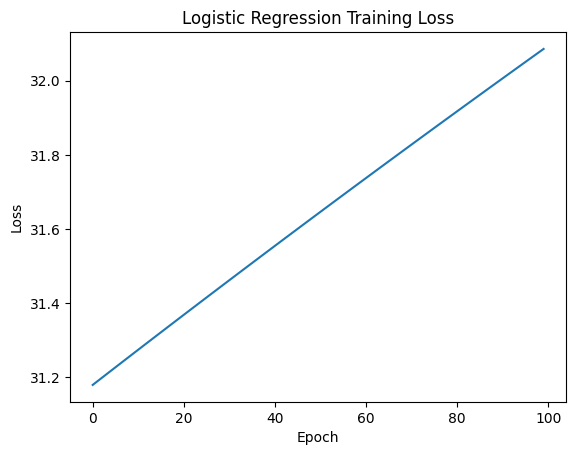

Accuracy on the given data: 55.56%


In [7]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

x = torch.tensor([1, 5, 10, 10, 25, 50, 70, 75, 100], dtype=torch.float32).view(-1, 1)
y = torch.tensor([0, 0, 0, 0, 0, 1, 1, 1, 1], dtype=torch.float32).view(-1, 1)

class LogisticRegressionModel(nn.Module):
    def __init__(self):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(1, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

model = LogisticRegressionModel()

criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 100
loss_list = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    y_pred = model(x)
    loss = criterion(y_pred, y)
    loss.backward()
    optimizer.step()
    loss_list.append(loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

plt.plot(loss_list)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Logistic Regression Training Loss')
plt.show()

with torch.no_grad():
    predictions = (model(x) > 0.5).float()
    accuracy = torch.mean((predictions == y).float())
    print(f'Accuracy on the given data: {accuracy.item():.2%}')